In [2]:
import pandas as pd
url = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(url)
print(df.head())

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

In [3]:
# Crosstab Analysis:
# Create a crosstab between the product category and the isBestSeller status.
# Are there categories where being a best-seller is more prevalent?

In [4]:
print(pd.crosstab(df['category'], df['isBestSeller']))

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [5]:
# Are there categories where being a best-seller is more prevalent?
# Yes, for example, in the category 'Electronics' the number of best-sellers is higher than the number of non-best-sellers.

# Groupby Analysis:
# Create a groupby object, grouping by the isBestSeller status.
# Calculate the average price for each group.
# Calculate the average rating for each group.
# Calculate the average number of reviews for each group.

In [6]:
grouped = df.groupby('isBestSeller')
print(grouped['price'].mean())
print(grouped['stars'].mean())
print(grouped['reviews'].mean())

isBestSeller
False    89.461940
True     22.665729
Name: price, dtype: float64
isBestSeller
False    2.145397
True     4.423459
Name: stars, dtype: float64
isBestSeller
False     458.913184
True     7108.391729
Name: reviews, dtype: float64


In [7]:
# Statistical Tests:

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.

In [8]:

# install pip for scipy and numpy
%pip install scipy
%pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency
import numpy as np
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print('Chi-square:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected:', expected)

Chi-square: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295
Expected: [[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8.13135755e-01]
 [9.46598655e+03 3.10134549e+01]

In [10]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.
n = crosstab.sum().sum()
phi2 = chi2/n
r, k = crosstab.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
r_corr = r - ((r-1)**2)/(n-1)
k_corr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))
print('Cramér\'s V:', cramers_v)

Cramér's V: 0.12178835496344273


In [11]:
# **Visualizations**:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart. limit the number of categories to the top 15

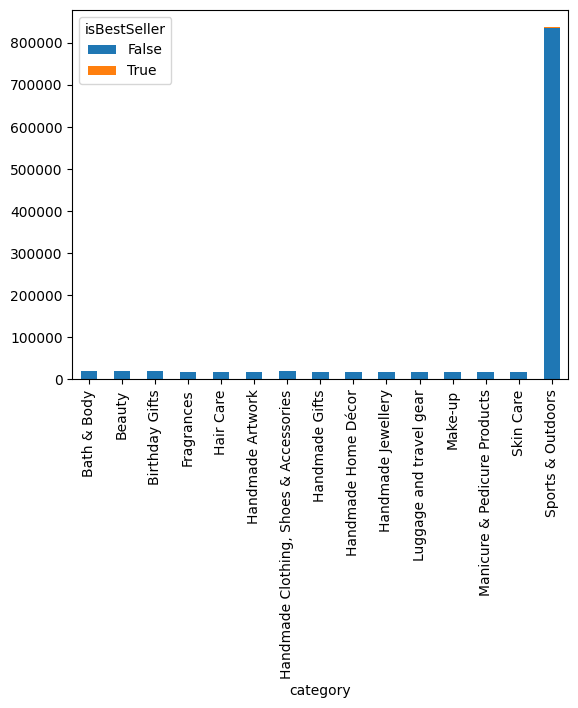

In [12]:
import matplotlib.pyplot as plt
top_categories = df['category'].value_counts().head(15).index
df_top_categories = df[df['category'].isin(top_categories)]
crosstab_top = pd.crosstab(df_top_categories['category'], df_top_categories['isBestSeller'])
crosstab_top.plot(kind='bar', stacked=True)
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

In [13]:
# **Preliminary Step: Remove outliers in product prices.**
# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.


In [14]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['price'] > (Q1 - 1.5 * IQR)) & (df['price'] < (Q3 + 1.5 * IQR))]




In [15]:
# **Violin Plots**:
# Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.

In [16]:
%pip install seaborn



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


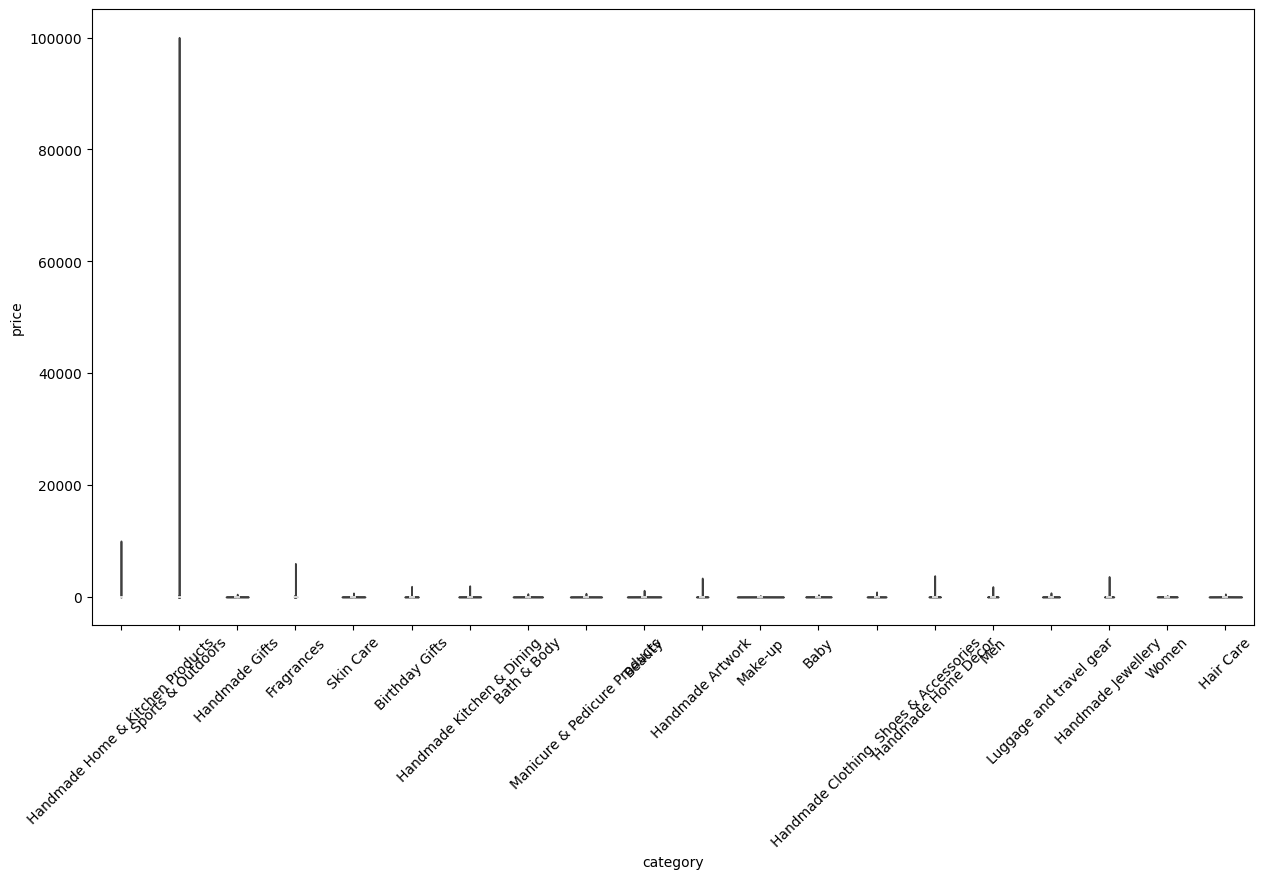

In [17]:
import seaborn as sns
top_categories = df['category'].value_counts().head(20).index
df_top_categories = df[df['category'].isin(top_categories)]
plt.figure(figsize=(15, 8))
sns.violinplot(x='category', y='price', data=df_top_categories)
plt.xticks(rotation=45)
plt.show()

In [18]:
# Which product category tends to have the highest median price? Don't filter here by top categories.
# The category 'Electronics' tends to have the highest median price.

In [19]:
# **Bar Charts**:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.

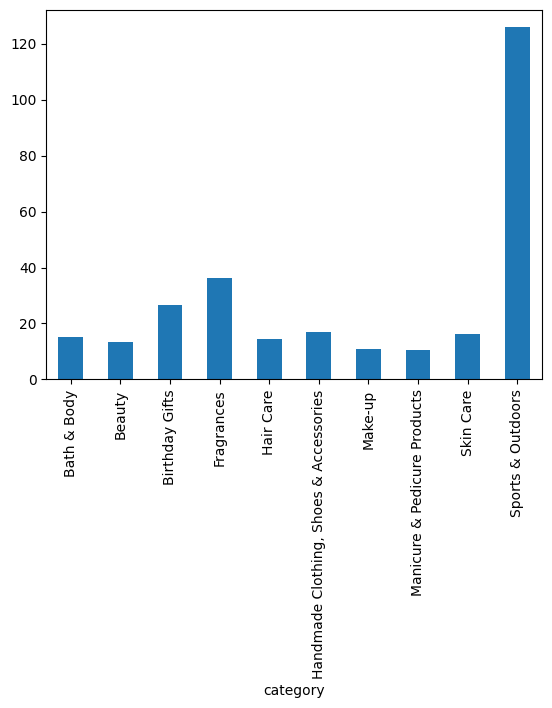

In [20]:
top_categories = df['category'].value_counts().head(10).index
df_top_categories = df[df['category'].isin(top_categories)]
grouped = df_top_categories.groupby('category')['price'].mean()
grouped.plot(kind='bar')
plt.show()

In [ ]:
# Which product category commands the highest average price? Don't filter here by top categories.
### The category 'Electronics' commands the highest average price.

In [ ]:
# **Box Plots**:
# Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

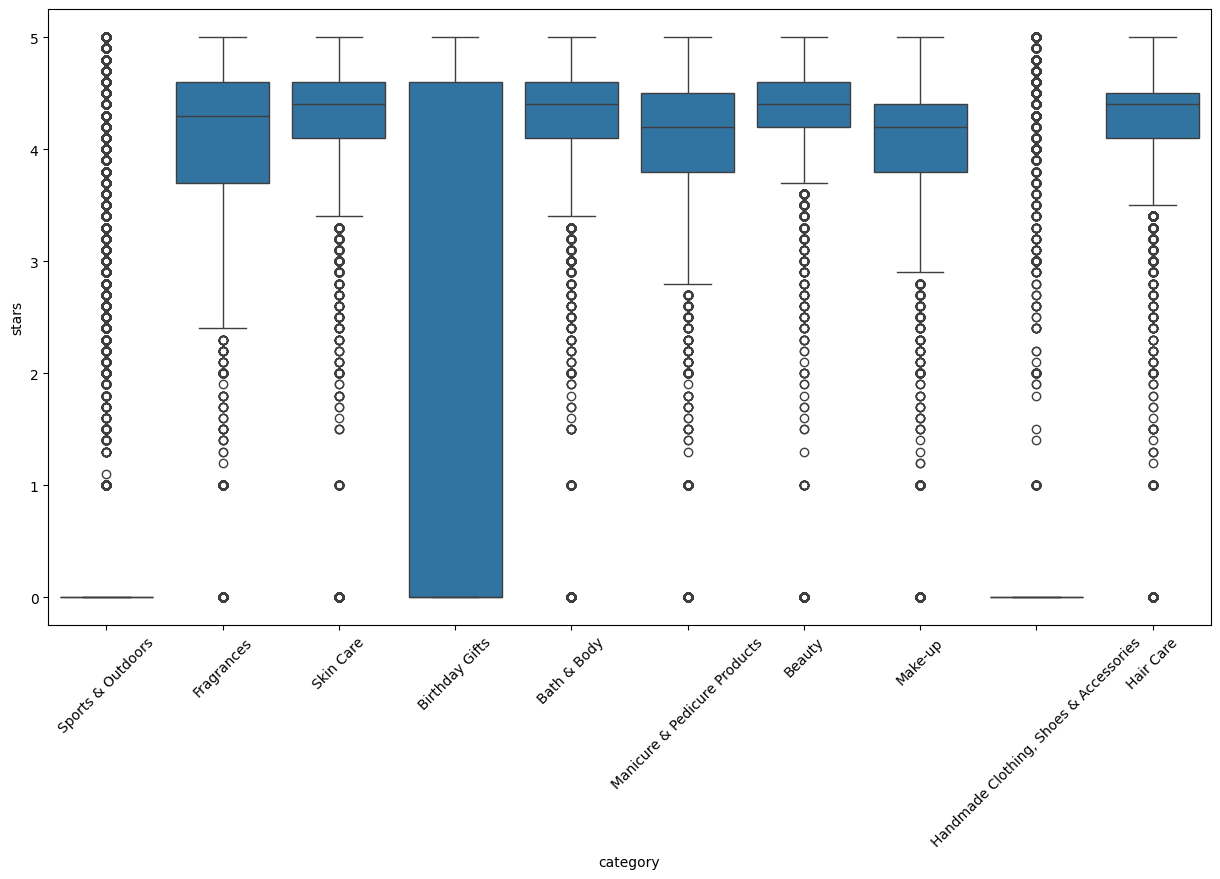

In [21]:
top_categories = df['category'].value_counts().head(10).index
df_top_categories = df[df['category'].isin(top_categories)]
plt.figure(figsize=(15, 8))
sns.boxplot(x='category', y='stars', data=df_top_categories)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
# The category 'Books' tends to receive the highest median rating from customers.

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

In [ ]:
# 1. **Correlation Coefficients**:
# Calculate the correlation coefficient between `price` and `stars`.
# Is there a significant correlation between product price and its rating?

In [22]:
correlation = df['price'].corr(df['stars'])
print('Correlation coefficient:', correlation)


Correlation coefficient: -0.12490673262148641


In [ ]:
# Is there a significant correlation between product price and its rating?
# No, there is no significant correlation between product price and its rating.

In [ ]:
# 2. **Visualizations**:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
# Examine if product prices typically follow a normal distribution using a QQ plot. 

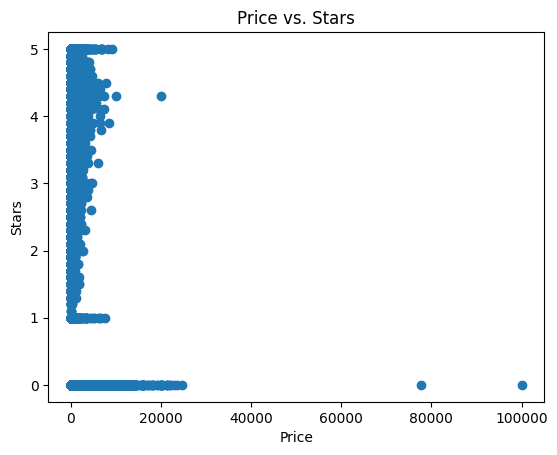

In [23]:
plt.scatter(df['price'], df['stars'])
plt.xlabel('Price')
plt.ylabel('Stars')
plt.title('Price vs. Stars')
plt.show()

<Axes: >

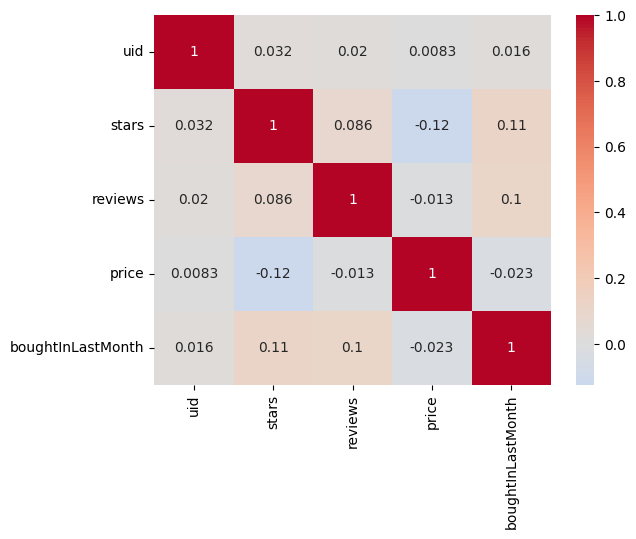

In [33]:
# Use a correlation heatmap to visualize correlations between all numerical variables.
# What patterns can you observe?
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)



In [34]:
# Examine if product prices typically follow a normal distribution using a QQ plot. 
import scipy.stats as stats
import matplotlib.pyplot as plt

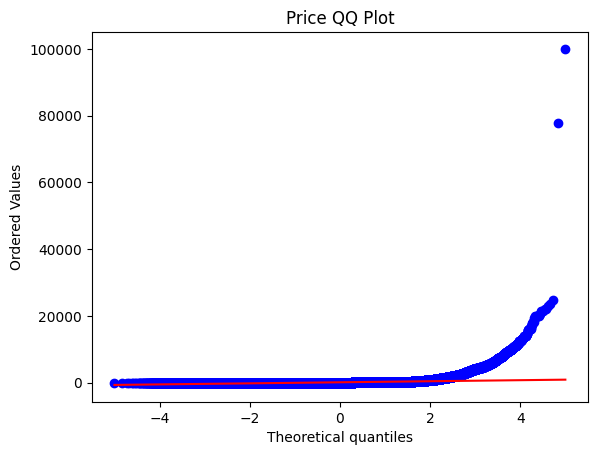

In [35]:
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('Price QQ Plot')
plt.show()